<a href="https://colab.research.google.com/github/fikahusnaamalinamubarok/Banking-Analyze-Marketing-Campaign/blob/main/Not_Handling_Fika_Husna_Amalina_Mubarok_Script_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hi, I'm Fika Husna Amalina Mubarok


#Business Understanding

Deposito merupakan salah satu produk tabungan yang diberikan oleh bank kepada nasabahnya selain tabungan biasa. Deposito adalah produk perbankan dimana nasabah menyetorkan sejumlah uang untuk disimpan di bank dalam jangka waktu yang lama. Uang ini tidak dapat ditarik sebelum jangka waktu tertentu, misalnya 1 tahun, 5 tahun atau 10 tahun. Keuntungan simpanan yang diperoleh nasabah adalah suku bunga yang ditawarkan bank lebih tinggi dibandingkan produk perbankan lainnya.

Salah satu cara paling efektif untuk menjangkau pelanggan adalah dengan Kampanye Pemasaran Telepon. Namun, biaya menjalankan kampanye ini cukup mahal. Bank perlu berinvestasi dalam mendukung properti dan menyewa banyak call center untuk menjalankan kampanye ini.

Oleh karena itu, penting untuk mengidentifikasi pelanggan yang paling mungkin berlangganan kampanye. Dengan menciptakan model untuk membantu tim pemasaran bekerja secara efektif dan efisien, bank dapat menghasilkan pengurangan biaya yang signifikan.

#Sasaran : Prediksi Kampanye Pemasaran

Pernyataan Masalah:

(a) Fitur mana yang memberikan kontribusi tingkat berlangganan yang tinggi?

(b) Model analitik mana yang memiliki prediksi skor tertinggi?

(c) Strategi apa yang dapat digunakan tim pemasaran untuk berhasil dalam kampanye mereka?

#Methodology

Prediksi langganan merupakan tujuan yang ingin dicapai. Seperti yang kita ketahui, berlangganan adalah Klasifikasi Biner. Dalam analisis klasifikasi masalah akan diselesaikan dengan menggunakan model Klasifikasi. Oleh karena itu, metodologi dalam proyek ini adalah membangun model Klasifikasi Biner dengan target Berlangganan

Data : Dataset Analisis Target Pemasaran diperoleh dari kaggle.com 
https://www.kaggle.com/code/berkinkaplanolu/banking-analyze/data?select=train.csv

Asumsi Data : Dalam proyek ini kita hanya akan menggunakan train.csv

# Data Dictionary

1 - ID : ID klien

2 - usia (age) (numerik)

3 - pekerjaan (job): jenis pekerjaan (kategoris: "admin.", "kerah biru", "wirausahawan", "pembantu rumah tangga", "manajemen", "pensiunan", "wiraswasta", "jasa", "mahasiswa" ,"teknisi", "menganggur", "tidak diketahui")

4 - perkawinan (marital) : status perkawinan (kategori: "cerai", "menikah", "lajang"; catatan: "cerai" berarti cerai atau janda)

5 - pendidikan (education) :(kategoris: "primer", "sekunder", "tersier,"tidak diketahui")

6 - default (default): memiliki kredit default? (kategoris: "tidak", "ya")

7 - saldo (balance) : punya uang di rekening? (numerik)

8 - perumahan (housing): memiliki pinjaman perumahan? (kategoris: "tidak", "ya")

9 - pinjaman (loan): memiliki pinjaman pribadi? (kategoris: "tidak", "ya")

10 - kontak (contact) : jenis komunikasi kontak (kategoris: "seluler", "telepon")

11 - bulan ( month) : kontak terakhir bulan dalam setahun (kategoris: "jan", "feb", "mar", ..., "nov", "dec")

12 - hari (day) : hari kontak terakhir dalam seminggu

13 - durasi (duration) : durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y="tidak"). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

14 - kampanye (campaign) : jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)

15 - pdays (pdays): jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; -1 berarti klien tidak dihubungi sebelumnya)

16 - sebelumnya (previous ): jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)

17 - hasil (poutcome): hasil dari kampanye pemasaran sebelumnya (kategoris: "gagal", "tidak diketahui", "lainnya", "sukses")

Variabel keluaran (target yang diinginkan):

18 - berlangganan (subscribed) - apakah klien telah berlangganan deposito berjangka? (biner: "ya","tidak")

Dalam buku catatan ini saya hanya akan menggunakan train.csv.

### Mounting with your Google Drive

In [ ]:
#mounting with ur g drive
from google.colab import drive
drive.mount('/content/drive')

###Import Library

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# First we'll import all libraries that will be used in this project
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

# encoding
from sklearn import preprocessing

# split data
from sklearn.model_selection import train_test_split

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

# import dalex to explain complex model
import dalex as dx

###Load Data And Data Understanding

In [ ]:
# Import data from google drive 
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


- Terdapat 31647 rows dan 18 columns
- Memiliki Target `subscribed` .
- Kita tidak memerlukan `ID` dalam case ini. akan kita handle nanti. 

#Basic Data Cleaning

### Handling Missing value

In [ ]:
# Make table summary of missing value count with the percentage
data_nan = train.isna().sum().reset_index()
data_nan.columns = ['feature','missing_value']
data_nan['percentage'] = round((data_nan['missing_value']/len(train))*100,3)
data_nan = data_nan.sort_values('percentage', ascending=False).reset_index(drop=True)
data_nan = data_nan[data_nan['percentage']>0]
data_nan

,feature,missing_value,percentage


### Check Duplicated data 

In [ ]:
# check duplicated data
train.duplicated().sum()

0

In [ ]:
# We will also drop customer ID cause we won't use it
train.drop(["ID"],axis=1,inplace = True)

#Exploratory Data Analysis

In [ ]:
#Merubah nilai target kategorik (yes dan no) menjadi nilai numerik ( 1 dan 0)

le = preprocessing.LabelEncoder()
le.fit(train['subscribed'])
train['subscribed'] = le.transform(train['subscribed'])
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


# Baseline Model

In [ ]:
# Dataset ini akan kita gunakan sebagai baseline model
numerik = ['age','balance','day','duration','campaign','pdays','previous','subscribed']
train_numerik = train[numerik]
train_numerik.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed
0,56,1933,19,44,2,-1,0,0
1,31,3,20,91,2,-1,0,0
2,27,891,18,240,1,-1,0,0
3,57,3287,22,867,1,84,3,1
4,31,119,4,380,1,-1,0,0


In [ ]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

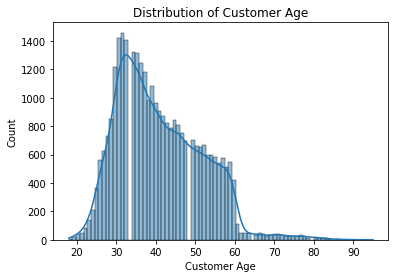

In [ ]:
# Fitur Age 
sns.histplot(train['age'],kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.show

In [ ]:
# umur 60 tahun keatas terindikasi outliers, maka perlu di cek value dari umur > 60

bool_filter = (train['job'] == 'retired') & (train['age'] > 60)
train[bool_filter].sort_values('age',ascending = False).head(10)

# ternyata di isi oleh para pensiunan dengan umur maximum adalah 95 tahun, value masih masuk akal dan dapat digunakan.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12870,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,1
19775,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,0
14140,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,1
11394,92,retired,married,unknown,no,775,no,no,cellular,22,oct,313,3,-1,0,unknown,1
30257,90,retired,divorced,primary,no,712,no,no,telephone,3,mar,557,1,-1,0,unknown,1
25960,89,retired,divorced,primary,no,1323,no,no,telephone,29,dec,207,4,189,1,other,0
15419,89,retired,married,primary,no,0,no,no,telephone,27,sep,157,5,-1,0,unknown,0
6390,88,retired,married,primary,no,648,no,no,telephone,3,sep,318,1,-1,0,unknown,0
14290,88,retired,married,secondary,no,433,no,no,telephone,15,sep,161,1,274,1,failure,0
920,87,retired,married,primary,no,230,no,no,cellular,30,oct,144,1,-1,0,unknown,1


In [ ]:
# fitur job
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [ ]:
# Precentage Unknow 
100 * len(train[train['job'].isin(['unknown'])]) / len(train)

0.6509305779378772

In [ ]:
# membuat dataframe Eduratio, sebagai acuan untuk memodifikasi value unknown di kolom job dan education
eduRatio = pd.DataFrame({'Job' : []})
for i in train["job"].unique():
    eduRatio = eduRatio.append(train[(train["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / train[(train["job"] == i)]["education"].value_counts().sum())
eduRatio["Job"] = train["job"].unique()
eduRatio

,Job,education
secondary,admin.,82.153677
unknown,unknown,47.087379
secondary,services,83.396486
tertiary,management,82.301551
secondary,technician,68.890145
secondary,retired,43.392630
secondary,blue-collar,54.808536
primary,housemaid,49.771167
tertiary,self-employed,52.894034
secondary,student,54.488189


In [ ]:
# mehandle value unknown pada kolom job
train.loc[(train.job == "unknown") & (train.education == "secondary"),"job"] = "services"
train.loc[(train.job == "unknown") & (train.education == "primary"),"job"] = "housemaid"
train.loc[(train.job == "unknown") & (train.education == "tertiary"),"job"] = "management"
train.loc[(train.job == "unknown"),"job"] = "blue-collar"

In [ ]:
train["job"].value_counts()

blue-collar      6939
management       6662
technician       5307
admin.           3631
services         2952
retired          1574
self-employed    1123
entrepreneur     1008
housemaid         911
unemployed        905
student           635
Name: job, dtype: int64

In [ ]:
train.groupby('job').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,job,subscribed
8,student,0.286614
5,retired,0.229987
10,unemployed,0.142541
4,management,0.138997
6,self-employed,0.124666
0,admin.,0.124484
9,technician,0.111928
3,housemaid,0.088913
7,services,0.088415
2,entrepreneur,0.084325


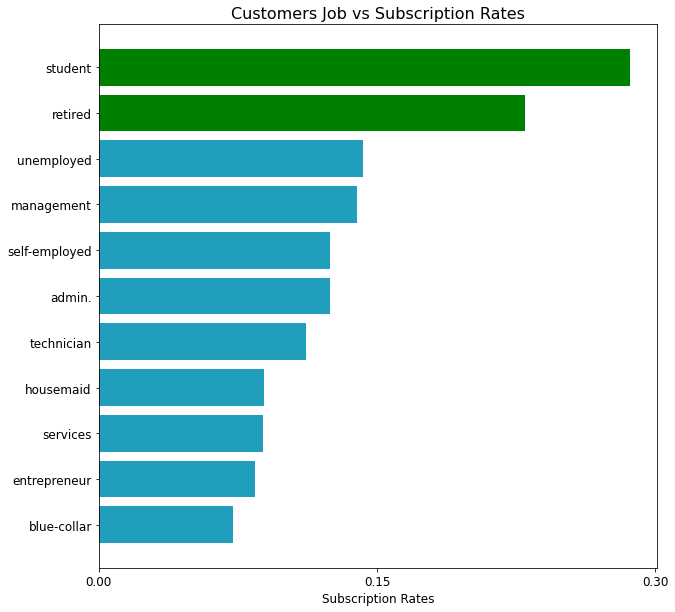

In [ ]:
y = train.groupby('job').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=True)['subscribed']
x = train.groupby('job').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=True)['job']

plt.figure(figsize=(10,10))
plt.title('Customers Job vs Subscription Rates',size=16)
plt.barh(x,y,color=['#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','#219ebc','Green','Green'])
plt.xticks([0,0.15,0.30],size=12)
plt.yticks(size=12)
plt.xlabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# fitur marital
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [ ]:
train.groupby('marital').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,marital,subscribed
2,single,0.151423
0,divorced,0.122590
1,married,0.100498


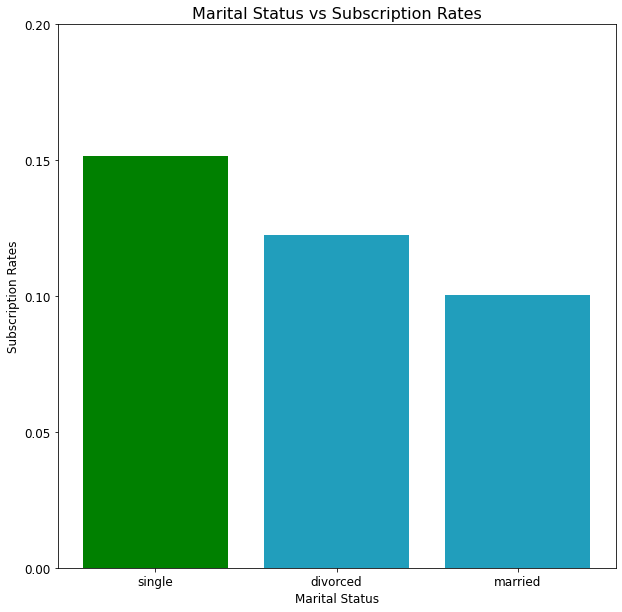

In [ ]:
#Melihat dengan barplot dari marital status para subscriotion
x = train.groupby('marital').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['marital']
y = train.groupby('marital').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(10,10))
plt.title('Marital Status vs Subscription Rates',size=16)
plt.bar(x,y,color=['Green','#219ebc','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Marital Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur education
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [ ]:
#Precentage Unknown isin education 
100 * len(train[train['education'].isin(['unknown'])]) / len(train)

4.152052327234809

In [ ]:
# mehandle value unknown pada kolom education
train.loc[(train.education == "unknown") & (train.job == "admin."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "management"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "services"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "technician."),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "retired"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "blue-collar"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "housemaid."),"education"] = "primary"
train.loc[(train.education == "unknown") & (train.job == "self-employed"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "student"),"education"] = "secondary"
train.loc[(train.education == "unknown") & (train.job == "entrepreneur"),"education"] = "tertiary"
train.loc[(train.education == "unknown") & (train.job == "unemployed"),"education"] = "secondary"

train.loc[(train.education == "unknown"),"education"] = "secondary"

In [ ]:
train["education"].value_counts()

secondary    17350
tertiary      9489
primary       4808
Name: education, dtype: int64

In [ ]:
train.groupby('education').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,education,subscribed
2,tertiary,0.151017
1,secondary,0.106916
0,primary,0.088810


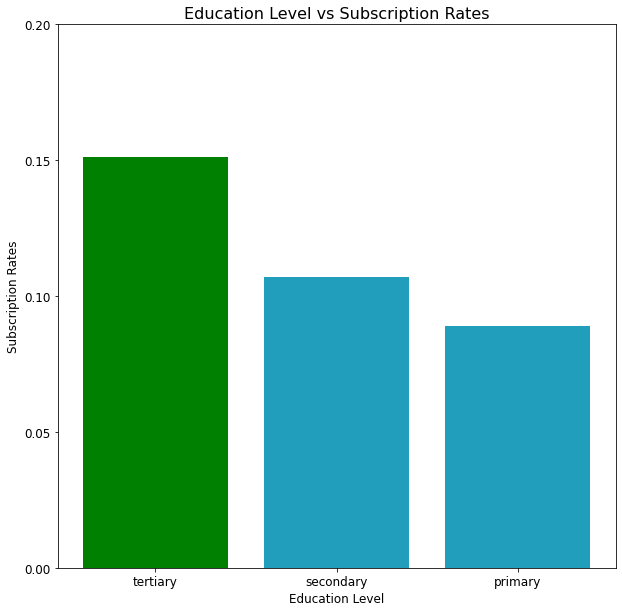

In [ ]:
x = train.groupby('education').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['education']
y = train.groupby('education').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(10,10))
plt.title('Education Level vs Subscription Rates',size=16)
plt.bar(x,y,color=['Green','#219ebc','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Education Level',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur default
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

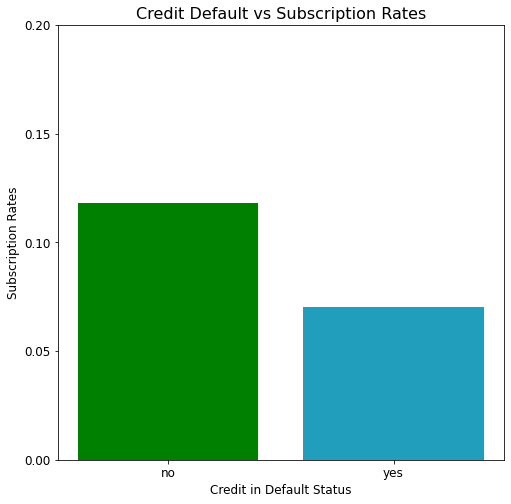

In [ ]:
x = train.groupby('default').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['default']
y = train.groupby('default').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Credit Default vs Subscription Rates',size=16)
plt.bar(x,y,color=['Green','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Credit in Default Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur housing
train['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [ ]:
train.groupby('housing').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,housing,subscribed
0,no,0.168172
1,yes,0.076774


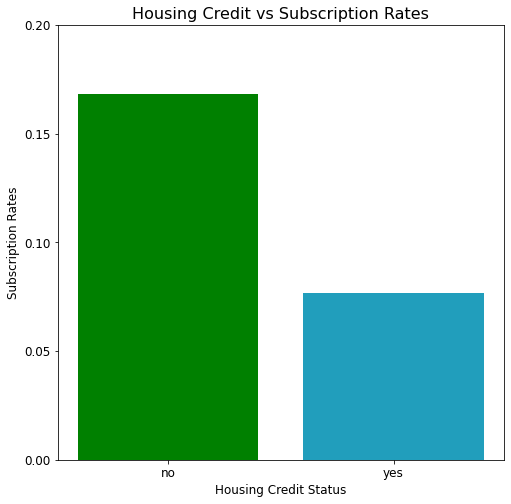

In [ ]:
x = train.groupby('housing').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['housing']
y = train.groupby('housing').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Housing Credit vs Subscription Rates',size=16)
plt.bar(x,y,color=['Green','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Housing Credit Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur loan
train['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

In [ ]:
train.groupby('loan').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,loan,subscribed
0,no,0.127621
1,yes,0.064510


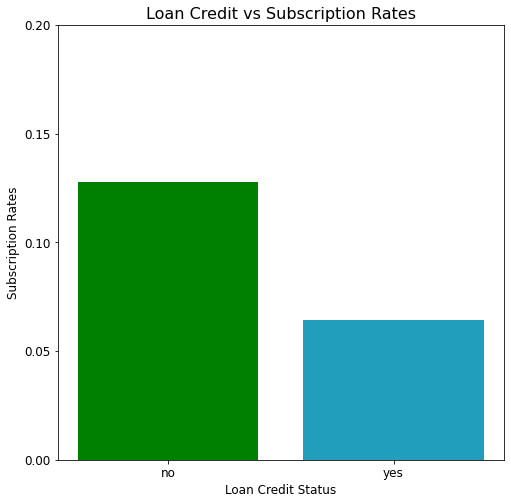

In [ ]:
x = train.groupby('loan').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['loan']
y = train.groupby('loan').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Loan Credit vs Subscription Rates',size=16)
plt.bar(x,y,color=['Green','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.05,0.10,0.15,0.2],size=12)
plt.xlabel('Loan Credit Status',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menggali insight dari fitur contact
train['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [ ]:
#precentage Unknown is in contact
100 * len(train[train['contact'].isin(['unknown'])]) / len(train)

28.998009289980093

In [ ]:
# mehandle value unknown pada kolom contact
train["contact"].replace(["unknown"],train["contact"].mode(),inplace = True)

In [ ]:
train['contact'].value_counts()

cellular     29600
telephone     2047
Name: contact, dtype: int64

In [ ]:
train.groupby('contact').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,contact,subscribed
1,telephone,0.130923
0,cellular,0.116453


In [ ]:
train['month'].value_counts().sort_values(ascending=False)

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

In [ ]:
# menggali insight dari fitur poutcome
train['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [ ]:
#precentage unknwon is in poutcome
100 * len(train[train['poutcome'].isin(['unknown'])]) / len(train)

81.93193667646223

In [ ]:
# Mengecek value unknown pada poutcome, terlihat semua value 'unknown' pada poutcomes memiliki nilai pdays = -1,
filter = (train['poutcome'] == 'unknown')
train[filter].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,services,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
5,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,0


In [ ]:
# mencari value unknown yang tidak sama dengan 1
filter = (train['poutcome'] == 'unknown') & (train['pdays'] != -1) 
train[filter]
# terdapat 5 baris yang memiliki nilai poutcome = uknown dan pdays = -1
# karena nilai relatif sedikit, maka saya akan membiarkannya

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
12610,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,0
15099,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,1
18469,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,0
25409,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,1
25640,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,0


In [ ]:
filter = (train['poutcome'] != 'unknown') & (train['pdays'] == -1) 
train[filter].head()
# tidak ada nilai uknown pada poutcomes yang memiliki nilai pdays selain -1
# maka fitur poutcomes bisa tetap di gunakan dengan terlebih dahulu memproses nilai -1 pada pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


In [ ]:
train['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [ ]:
train.groupby('poutcome').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,poutcome,subscribed
2,success,0.649813
1,other,0.168478
0,failure,0.128198
3,unknown,0.091519


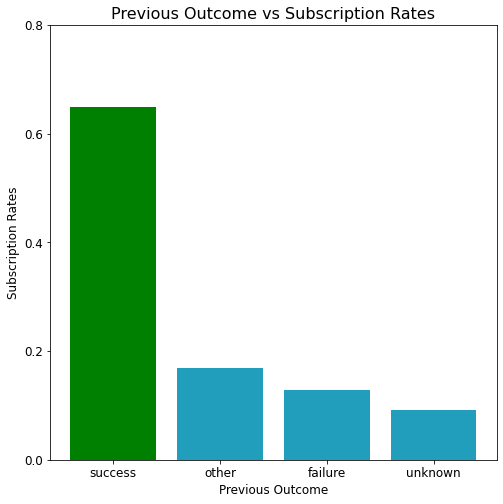

In [ ]:
x = train.groupby('poutcome').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['poutcome']
y = train.groupby('poutcome').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Previous Outcome vs Subscription Rates',size=16)
plt.bar(x,y,color=['Green','#219ebc','#219ebc','#219ebc'])
plt.xticks(size=12)
plt.yticks([0,0.2,0.4,0.6,0.8],size=12)
plt.xlabel('Previous Outcome',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# fitur balance
train.groupby('subscribed').agg({'balance':'median'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,balance
1,1,746.0
0,0,418.0


In [ ]:
# fitur previous
train.groupby('subscribed').agg({'previous':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,previous
1,1,1.159354
0,0,0.496456


In [ ]:
# fitur campaign
train.groupby('subscribed').agg({'campaign':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,campaign
1,1,2.162853
0,0,2.845876


In [ ]:
# fitur pdays
train.groupby('subscribed').agg({'pdays':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,pdays
1,1,69.066218
0,0,35.653802


In [ ]:
# fitur duration
train.groupby('subscribed').agg({'duration':'median'}).reset_index().sort_values('subscribed',ascending=False)

,subscribed,duration
1,1,423.0
0,0,164.0


In [ ]:
# menkonversi duration dari detik ke menit
durasi_telfon = []
for i in train['duration']:
  if i < 60 : 
    durasi_telfon.append(1)
  elif i < 300 :
    durasi_telfon.append(5)
  elif i < 600 :
    durasi_telfon.append(10)
  elif i < 900 :
    durasi_telfon.append(15)
  elif i < 1200 :
    durasi_telfon.append(20)
  elif i < 1500:
    durasi_telfon.append(25)
  elif i < 1800 :
    durasi_telfon.append(30)
  else :
    durasi_telfon.append(40)

In [ ]:
train_graph = train
train_graph['durasi_telfon'] = durasi_telfon

In [ ]:
# mengelompokan customer berdasarkan umur
age_category = []
for i in train['duration']:
  if i < 20 : 
    age_category.append('0-20')
  elif i < 40 :
    age_category.append('21-40')
  elif i < 60 :
    age_category.append('41-60')
  else: 
    age_category.append('> 60')

In [ ]:
train_graph['age_category'] = age_category
train_graph.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,durasi_telfon,age_category
0,56,admin.,married,secondary,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0,1,41-60
1,31,services,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0,5,> 60
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0,5,> 60
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1,15,> 60
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0,10,> 60


In [ ]:
# menggali insight durasi telfon terhadap umur, telemarketing mengabiskan 206770 menit menelepon customer dengan umur > 60
train_graph.groupby('age_category').agg({'durasi_telfon':'sum'}).reset_index().sort_values('durasi_telfon',ascending=False)

,age_category,durasi_telfon
3,> 60,206770
2,41-60,1446
1,21-40,989
0,0-20,807


In [ ]:
# Melihat potensi age category terhadap subscription rate, umur > 60 mendapat nilai tertinggi yaitu 0.13
train_graph.groupby('age_category').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)

,age_category,subscribed
3,> 60,0.130611
0,0-20,0.002478
1,21-40,0.002022
2,41-60,0.000692


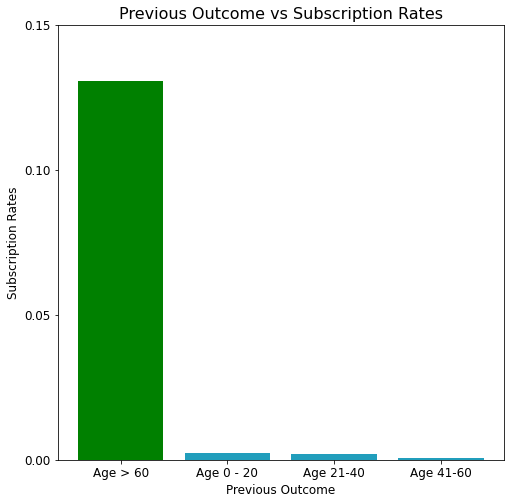

In [ ]:
x = train_graph.groupby('age_category').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['age_category']
y = train_graph.groupby('age_category').agg({'subscribed':'mean'}).reset_index().sort_values('subscribed',ascending=False)['subscribed']

plt.figure(figsize=(8,8))
plt.title('Previous Outcome vs Subscription Rates',size=16)
plt.bar(x,y,color=['Green','#219ebc','#219ebc','#219ebc'])
plt.xticks(np.arange(4),['Age > 60','Age 0 - 20', 'Age 21-40', 'Age 41-60'],size=12)
plt.yticks([0,0.05,0.1,0.15],size=12)
plt.xlabel('Previous Outcome',size=12)
plt.ylabel('Subscription Rates',size=12)
plt.show()

In [ ]:
# menghitung pengeluaran perusahaan berdasarkan durasi telfon
durasi = (train['duration'].sum())/60
print(durasi)

136141.98333333334


In [ ]:
# Menghitung subscription rates awal
train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

In [ ]:
rate = 3715/(3715+27932)
rate

0.11738869403102979

In [ ]:
# jumlah customer yang akan di telfon di awal
train.shape

(31647, 19)

In [ ]:
# fitur day dan month juga tidak perlu di gunakan karena sudah terwakilkan dengan fitur pdays
train.drop(columns = ["day","month",'age_category','durasi_telfon'],inplace = True)

In [ ]:
train['subscribed'].value_counts()
# kondisi target imbalance

0    27932
1     3715
Name: subscribed, dtype: int64

In [ ]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,telephone,44,2,-1,0,unknown,0
1,31,services,married,secondary,no,3,no,no,cellular,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,380,1,-1,0,unknown,0


# Data Preprocessing

In [ ]:
train_new = train.drop('job', axis = 1)
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,married,secondary,no,1933,no,no,telephone,44,2,-1,0,unknown,0
1,31,married,secondary,no,3,no,no,cellular,91,2,-1,0,unknown,0
2,27,married,secondary,no,891,yes,no,cellular,240,1,-1,0,unknown,0
3,57,divorced,tertiary,no,3287,no,no,cellular,867,1,84,3,success,1
4,31,married,secondary,no,119,yes,no,cellular,380,1,-1,0,unknown,0


#Feature Engineering

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train_new['housing'])
le.fit(train_new['loan'])
le.fit(train_new['default'])

LabelEncoder()

In [ ]:
train_new['housing']= le.transform(train_new['housing'])
train_new['default']= le.transform(train_new['default']) 
train_new['loan']= le.transform(train_new['loan'])

In [ ]:
le.fit(train_new['contact'])
train_new['contact']= le.transform(train_new['contact'])

In [ ]:
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0


In [ ]:
dummies_marital = pd.get_dummies(train['marital'],prefix='marital')
dummies_marital.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [ ]:
train_new = pd.concat([train_new, dummies_marital], axis=1)
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0,0,1,0
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0,0,1,0
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0,0,1,0
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1,1,0,0
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0,0,1,0


In [ ]:
dummies_education = pd.get_dummies(train['education'],prefix='education')
dummies_education.head()

,education_primary,education_secondary,education_tertiary
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
train_new = pd.concat([train_new, dummies_education], axis=1)
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0,0,1,0,0,1,0
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0,0,1,0,0,1,0
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0,0,1,0,0,1,0
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1,1,0,0,0,0,1
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0,0,1,0,0,1,0


In [ ]:
dummies_poutcome = pd.get_dummies(train['poutcome'],prefix='poutcome')
dummies_poutcome.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,0,1


In [ ]:
train_new = pd.concat([train_new, dummies_poutcome], axis=1)
pd.options.display.max_columns = 100
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,married,secondary,0,1933,0,0,1,44,2,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1
1,31,married,secondary,0,3,0,0,0,91,2,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1
2,27,married,secondary,0,891,1,0,0,240,1,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1
3,57,divorced,tertiary,0,3287,0,0,0,867,1,84,3,success,1,1,0,0,0,0,1,0,0,1,0
4,31,married,secondary,0,119,1,0,0,380,1,-1,0,unknown,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
for i in train_new['pdays']:
  if i == -1:
    train_new['pdays'] = train_new['pdays'].replace(i,0)
  if i > 0 :
    train_new['pdays'] = train_new['pdays'].replace(i,1/i)

In [ ]:
train_new.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,married,secondary,0,1933,0,0,1,44,2,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1
1,31,married,secondary,0,3,0,0,0,91,2,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1
2,27,married,secondary,0,891,1,0,0,240,1,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1
3,57,divorced,tertiary,0,3287,0,0,0,867,1,0.011905,3,success,1,1,0,0,0,0,1,0,0,1,0
4,31,married,secondary,0,119,1,0,0,380,1,0.000000,0,unknown,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
train_encoding = train_new.drop(['marital','education','contact','poutcome'], axis = 1)
train_encoding.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,subscribed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,0,1933,0,0,44,2,0.000000,0,0,0,1,0,0,1,0,0,0,0,1
1,31,0,3,0,0,91,2,0.000000,0,0,0,1,0,0,1,0,0,0,0,1
2,27,0,891,1,0,240,1,0.000000,0,0,0,1,0,0,1,0,0,0,0,1
3,57,0,3287,0,0,867,1,0.011905,3,1,1,0,0,0,0,1,0,0,1,0
4,31,0,119,1,0,380,1,0.000000,0,0,0,1,0,0,1,0,0,0,0,1


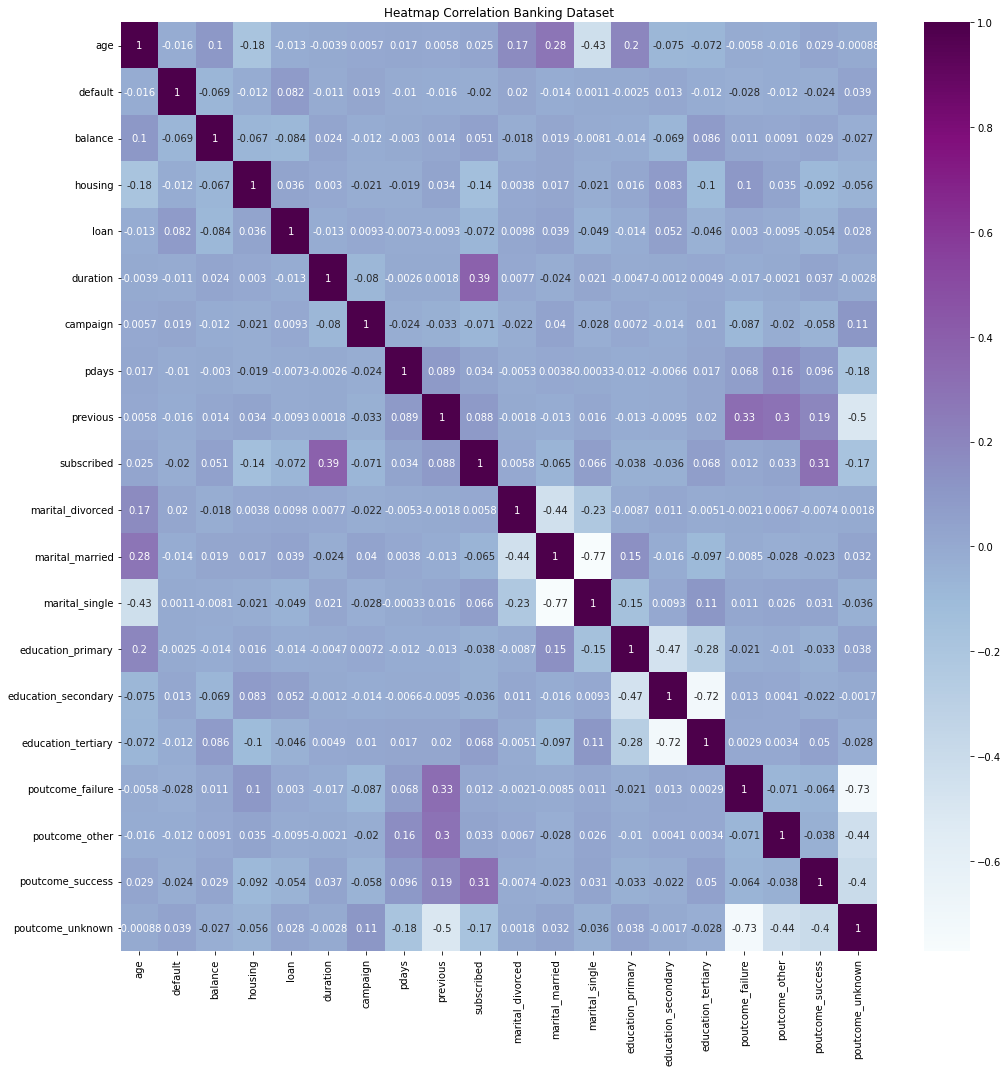

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_encoding.corr(),annot=True,cmap='BuPu')
plt.title('Heatmap Correlation Banking Dataset')
plt.tight_layout()
plt.show()

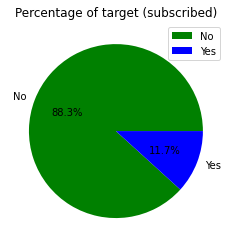

In [ ]:
mycolors = ["Green", "Blue"]
train_encoding['subscribed'].value_counts().plot(kind='pie', labels=['No','Yes'], autopct='%0.1f%%', colors = mycolors)
plt.title('Percentage of target (subscribed)')
plt.legend(['No','Yes'])
plt.ylabel(None)
plt.show()

#Modelling


#Decision Tree ( Base Model ) 

In [ ]:
# untuk perbandingan dari base model data kita
# split data test and train

from sklearn.model_selection import train_test_split

X = train_numerik.drop(['subscribed'],axis=1)
y = train_numerik['subscribed']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# modeling using decisiontree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X_train_1, y_train_1)
preds_dt = dt.predict(X_test)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score
# calculate Precision
print('Precision ',precision_score(y_test, preds_dt))
# calculate Recall
print('Recall ',recall_score(y_test, preds_dt))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds_dt))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_test, preds_dt))

Precision  0.3698630136986301
Recall  0.4062927496580027
F1 Score  0.3872229465449804
ROC-AUC  0.6579597343574886


# Decission Tree

In [ ]:
#Dengan data yang sudah kita Over SMOTE
# split data test and train

from sklearn.model_selection import train_test_split

X = train_encoding.drop(['subscribed'],axis=1)
y = train_encoding['subscribed']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Split the train data into train and validation
X = X_train_1
y = y_train_1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# modeling using decisiontree using validation data
from sklearn.tree import DecisionTreeClassifier
dt_val = DecisionTreeClassifier(max_depth=None)
dt_val.fit(X_train, y_train)
preds_dt_val = dt_val.predict(X_val)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score
# calculate Precision
print('Precision ',precision_score(y_val, preds_dt_val))
# calculate Recall
print('Recall ',recall_score(y_val, preds_dt_val))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds_dt_val))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_val, preds_dt_val))

Precision  0.41025641025641024
Recall  0.43463497453310695
F1 Score  0.4220939818631492
ROC-AUC  0.6762001688307995


In [ ]:
# modeling using decisiontree using test data
from sklearn.tree import DecisionTreeClassifier
dt_test = DecisionTreeClassifier(max_depth=None)
dt_test.fit(X_train, y_train)
preds_dt_test = dt_test.predict(X_test)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score
# calculate Precision
print('Precision ',precision_score(y_test, preds_dt_test))
# calculate Recall
print('Recall ',recall_score(y_test, preds_dt_test))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds_dt_test))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_test, preds_dt_test))

Precision  0.3958333333333333
Recall  0.4418604651162791
F1 Score  0.4175824175824176
ROC-AUC  0.6769045136797683


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5599
           1       0.40      0.44      0.42       731

    accuracy                           0.86      6330
   macro avg       0.66      0.68      0.67      6330
weighted avg       0.86      0.86      0.86      6330



Text(33.0, 0.5, 'Real Value')

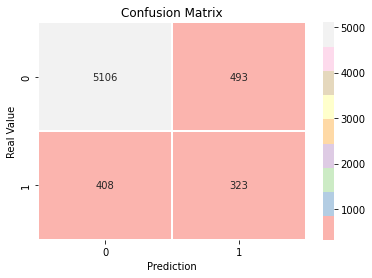

In [ ]:
# model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
cnf_matrix = confusion_matrix(y_test, preds_dt_test)
print(classification_report(y_test, preds_dt_test))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

# KNN 

In [ ]:
# modeling using KNN using validation data
from sklearn.neighbors import KNeighborsClassifier
knn_val = KNeighborsClassifier()
knn_val.fit(X_train, y_train)
preds_knn_val = knn_val.predict(X_val)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score
# calculate Precision
print('Precision ',precision_score(y_val, preds_knn_val))
# calculate Recall
print('Recall ',recall_score(y_val, preds_knn_val))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds_knn_val))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_val, preds_knn_val))

Precision  0.4262295081967213
Recall  0.22071307300509338
F1 Score  0.29082774049217003
ROC-AUC  0.5908034638768485


In [ ]:
# modeling using KNN using test data
from sklearn.neighbors import KNeighborsClassifier
knn_test = KNeighborsClassifier()
knn_test.fit(X_train, y_train)
preds_knn_test = knn_test.predict(X_test)

In [ ]:
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score
# calculate Precision
print('Precision ',precision_score(y_test, preds_knn_test))
# calculate Recall
print('Recall ',recall_score(y_test, preds_knn_test))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds_knn_test))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_test, preds_knn_test))

Precision  0.4265927977839335
Recall  0.2106703146374829
F1 Score  0.28205128205128205
ROC-AUC  0.5868497134894862


              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5599
           1       0.43      0.21      0.28       731

    accuracy                           0.88      6330
   macro avg       0.66      0.59      0.61      6330
weighted avg       0.85      0.88      0.86      6330



Text(33.0, 0.5, 'Real Value')

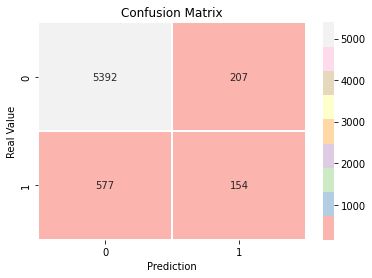

In [ ]:
# model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
cnf_matrix = confusion_matrix(y_test, preds_knn_test)
print(classification_report(y_test, preds_knn_test))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

#Naive Bayes

In [ ]:
# modeling using naive bayes
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
preds_nb_val = model_nb.predict(X_val)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds_nb_val))
# calculate Recall
print('Recall ',recall_score(y_val, preds_nb_val))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds_nb_val))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_val, preds_nb_val))

Precision  0.41029900332225916
Recall  0.41935483870967744
F1 Score  0.4147774979009236
ROC-AUC  0.6700126148855651


In [ ]:
nb_test = GaussianNB()
nb_test.fit(X_train, y_train)
preds_nb_test = nb_test.predict(X_test)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds_nb_test))
# calculate Recall
print('Recall ',recall_score(y_test, preds_nb_test))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds_nb_test))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_test, preds_nb_test))

Precision  0.4072289156626506
Recall  0.46238030095759236
F1 Score  0.43305573350416404
ROC-AUC  0.687253733261436


              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5599
           1       0.41      0.46      0.43       731

    accuracy                           0.86      6330
   macro avg       0.67      0.69      0.68      6330
weighted avg       0.87      0.86      0.86      6330



Text(33.0, 0.5, 'Real Value')

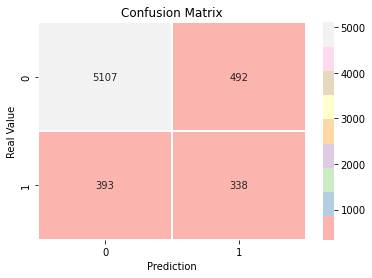

In [ ]:
# model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
cnf_matrix = confusion_matrix(y_test, preds_nb_test)
print(classification_report(y_test, preds_nb_test))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

# Random Forest

In [ ]:
# modeling using RandomForest using validation data
from sklearn.ensemble import RandomForestClassifier
rf_val = RandomForestClassifier(random_state=42)
rf_val.fit(X_train, y_train)
preds_rf_val = rf_val.predict(X_val)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds_rf_val))
# calculate Recall
print('Recall ',recall_score(y_val, preds_rf_val))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds_rf_val))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_val, preds_rf_val))

Precision  0.6028169014084507
Recall  0.3633276740237691
F1 Score  0.45338983050847453
ROC-AUC  0.6659096470677506


In [ ]:
# modeling using RandomForest using test data
rf_test = RandomForestClassifier(random_state=42)
rf_test.fit(X_train, y_train)
preds_rf_test = rf_test.predict(X_test)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds_rf_test))
# calculate Recall
print('Recall ',recall_score(y_test, preds_rf_test))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds_rf_test))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_test, preds_rf_test))

Precision  0.6025917926565875
Recall  0.3816689466484268
F1 Score  0.46733668341708545
ROC-AUC  0.6744029676982088


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5599
           1       0.60      0.38      0.47       731

    accuracy                           0.90      6330
   macro avg       0.76      0.67      0.71      6330
weighted avg       0.89      0.90      0.89      6330



Text(33.0, 0.5, 'Real Value')

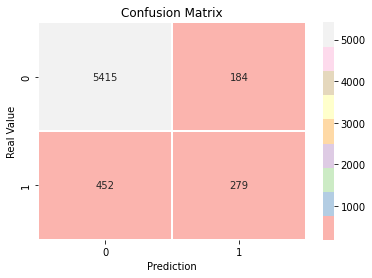

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_rf_test)
print(classification_report(y_test, preds_rf_test))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')

# Random Forest With Hyperparameter Tuning

In [ ]:
# split data test and train for Hyperparatemer Tunning

X = train_encoding.drop(['subscribed'],axis=1)
y = train_encoding['subscribed']

X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Split the train data into train and validation for Hyperparatemer Tunning
X = X_train_1
y = y_train_1

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# this is the general overview of our dataset for Hyperparatemer Tunning
print(f'X : {X.shape}')
print('-'*50)
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print('-'*50)
print(f'X_val : {X_val.shape}')
print(f'y_val : {y_val.shape}')
print('-'*50)
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X : (25317, 19)
--------------------------------------------------
X_train : (20253, 19)
y_train : (20253,)
--------------------------------------------------
X_val : (5064, 19)
y_val : (5064,)
--------------------------------------------------
X_test : (6330, 19)
y_test : (6330,)


In [ ]:
# build random forest model with Hyperparatemer Tunning
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# number of features to consider at every split
max_features = ['auto','sqrt']
# maximum number of levels in tree
max_depth = [2,4]
# minimun number of samples required to split a node
min_samples_split = [2,5]
# minimun number of samples required at each lad node
min_samples_leaf = [1,2]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# create the param grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
grid_value = pd.Series(param_grid, name='param_grid')
grid_value.index.name = 'parameter'
grid_value.reset_index()
print(grid_value)

parameter
n_estimators         [10, 17, 25, 33, 41, 48, 56, 64, 72, 80]
max_features                                     [auto, sqrt]
max_depth                                              [2, 4]
min_samples_split                                      [2, 5]
min_samples_leaf                                       [1, 2]
bootstrap                                       [True, False]
Name: param_grid, dtype: object


In [ ]:
rf_tuning = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
model_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose = 2, n_jobs = 4)

In [ ]:
model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
# the hyper parameter
model_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 64}

In [ ]:
# Hyperparatemer Tunning into the model
rf_tuning_val = RandomForestClassifier(bootstrap = False, max_depth =  4, max_features ='auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 64, random_state=42)
rf_tuning_val.fit(X_train, y_train)
preds_rf_tuning_val = rf_tuning_val.predict(X_val)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_val, preds_rf_tuning_val))
# calculate Recall
print('Recall ',recall_score(y_val, preds_rf_tuning_val))
# calculate F1 Score
print('F1 Score ',f1_score(y_val, preds_rf_tuning_val))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_val, preds_rf_tuning_val))

Precision  0.8018018018018018
Recall  0.15110356536502548
F1 Score  0.25428571428571434
ROC-AUC  0.5730936821238535


In [ ]:
# Hyperparatemer Tunning into the model
rf_tuning_test = RandomForestClassifier(bootstrap = False, max_depth =  4, max_features =  'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 64, random_state=42)
rf_tuning_test.fit(X_train, y_train)
preds_rf_tuning_test = rf_tuning_test.predict(X_test)

In [ ]:
# calculate Precision
print('Precision ',precision_score(y_test, preds_rf_tuning_test))
# calculate Recall
print('Recall ',recall_score(y_test, preds_rf_tuning_test))
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds_rf_tuning_test))
# calculate roc_auc Score
print('ROC-AUC ',roc_auc_score(y_test, preds_rf_tuning_test))

Precision  0.7902097902097902
Recall  0.1545827633378933
F1 Score  0.2585812356979405
ROC-AUC  0.5746123318386198


              precision    recall  f1-score   support

           0       0.90      0.99      0.95      5599
           1       0.79      0.15      0.26       731

    accuracy                           0.90      6330
   macro avg       0.85      0.57      0.60      6330
weighted avg       0.89      0.90      0.87      6330



Text(33.0, 0.5, 'Real Value')

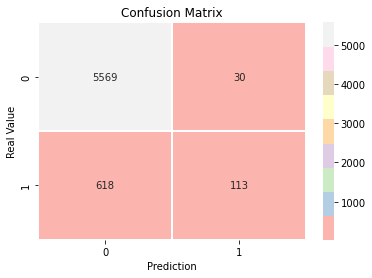

In [ ]:
# model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
cnf_matrix = confusion_matrix(y_test, preds_rf_tuning_test)
print(classification_report(y_test, preds_rf_tuning_test))
sns.heatmap(cnf_matrix,cmap='Pastel1',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Real Value')